In [2]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
#from st import sem
from scipy.stats import linregress

In [3]:
DC_crime = pd.read_csv('Resources/clean_crime_data.csv')


In [4]:
DC_crime.pop('Unnamed: 0')
DC_crime.head()

,YEAR,START_DATE,offensegroup,OFFENSE,offense-text,offensekey,START_TIME
0,2022,2022-04-12,violent,robbery,robbery,violent|robbery,20:00:00
1,2022,2022-03-16,property,theft f/auto,theft f/auto,property|theft f/auto,17:00:00
2,2022,2022-03-01,property,theft f/auto,theft f/auto,property|theft f/auto,16:00:00
3,2022,2022-03-17,property,motor vehicle theft,motor vehicle theft,property|motor vehicle theft,10:45:00
4,2022,2022-03-17,property,motor vehicle theft,motor vehicle theft,property|motor vehicle theft,16:45:00


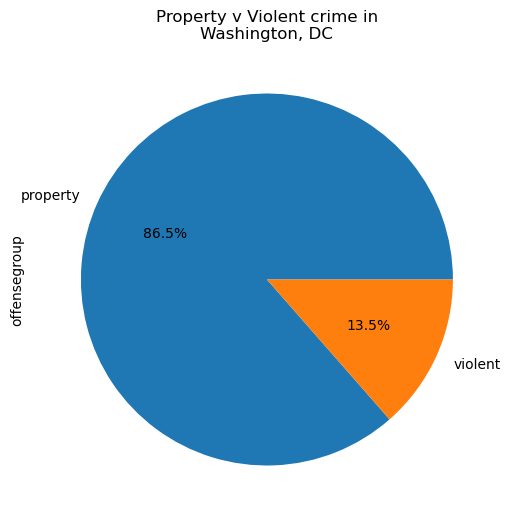

False    23945
True      3752
Name: offensegroup, dtype: int64

In [5]:
DC_crime["offensegroup"].value_counts().plot(kind='pie', figsize=(6,8), autopct="%1.1f%%")
plt.title("""Property v Violent crime in
Washington, DC""")

plt.show()
(DC_crime['offensegroup'] == "violent").value_counts()

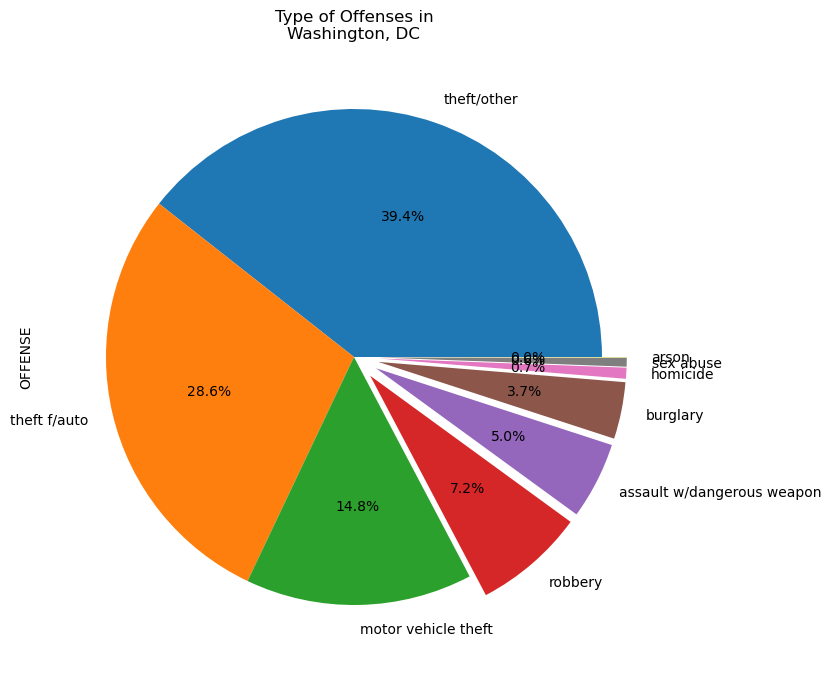

In [6]:
explode = (0,0,0,0.1,0.1,0.1,0.1,0.1,0.1)
DC_crime["OFFENSE"].value_counts().plot(kind='pie', figsize=(8,10), explode = explode, autopct="%1.1f%%")
plt.title("""Type of Offenses in
Washington, DC""")

plt.savefig("output_crime_data/Type_of_Offenses.png")
plt.show()


In [7]:
mean = (DC_crime.groupby('START_DATE')['OFFENSE'].count()).mean()
median = (DC_crime.groupby('START_DATE')['OFFENSE'].count()).median()
mode = (DC_crime.groupby('START_DATE')['OFFENSE'].count()).mode()
mean, median, mode

(75.46866485013624,
 75.0,
 0    75
 Name: OFFENSE, dtype: int64)

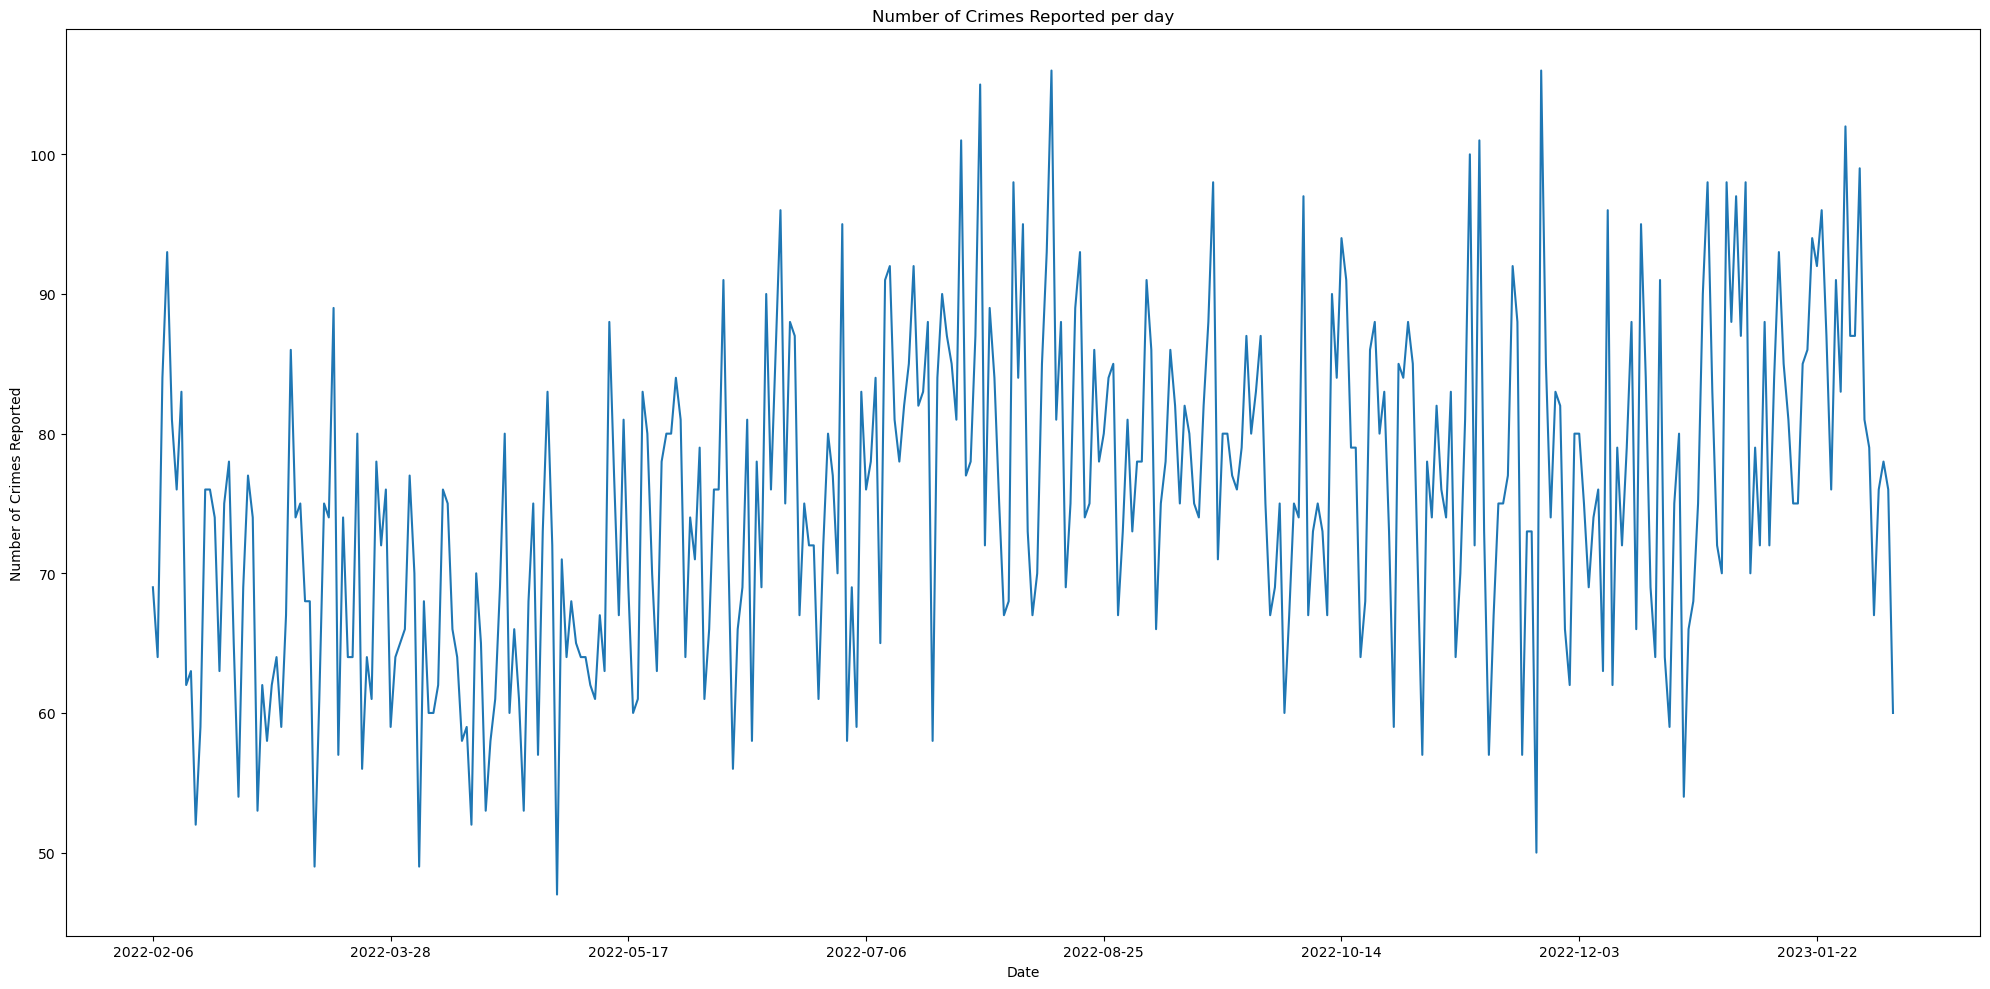

In [21]:
DC_crime.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10))

# Set the xlabel and ylabel using class methods
plt.ylabel("Number of Crimes Reported")
plt.xlabel("Date")
plt.title("Number of Crimes Reported per day")

plt.tight_layout()
plt.savefig("output_crime_data/Number_of_Crimes.png")
plt.show()

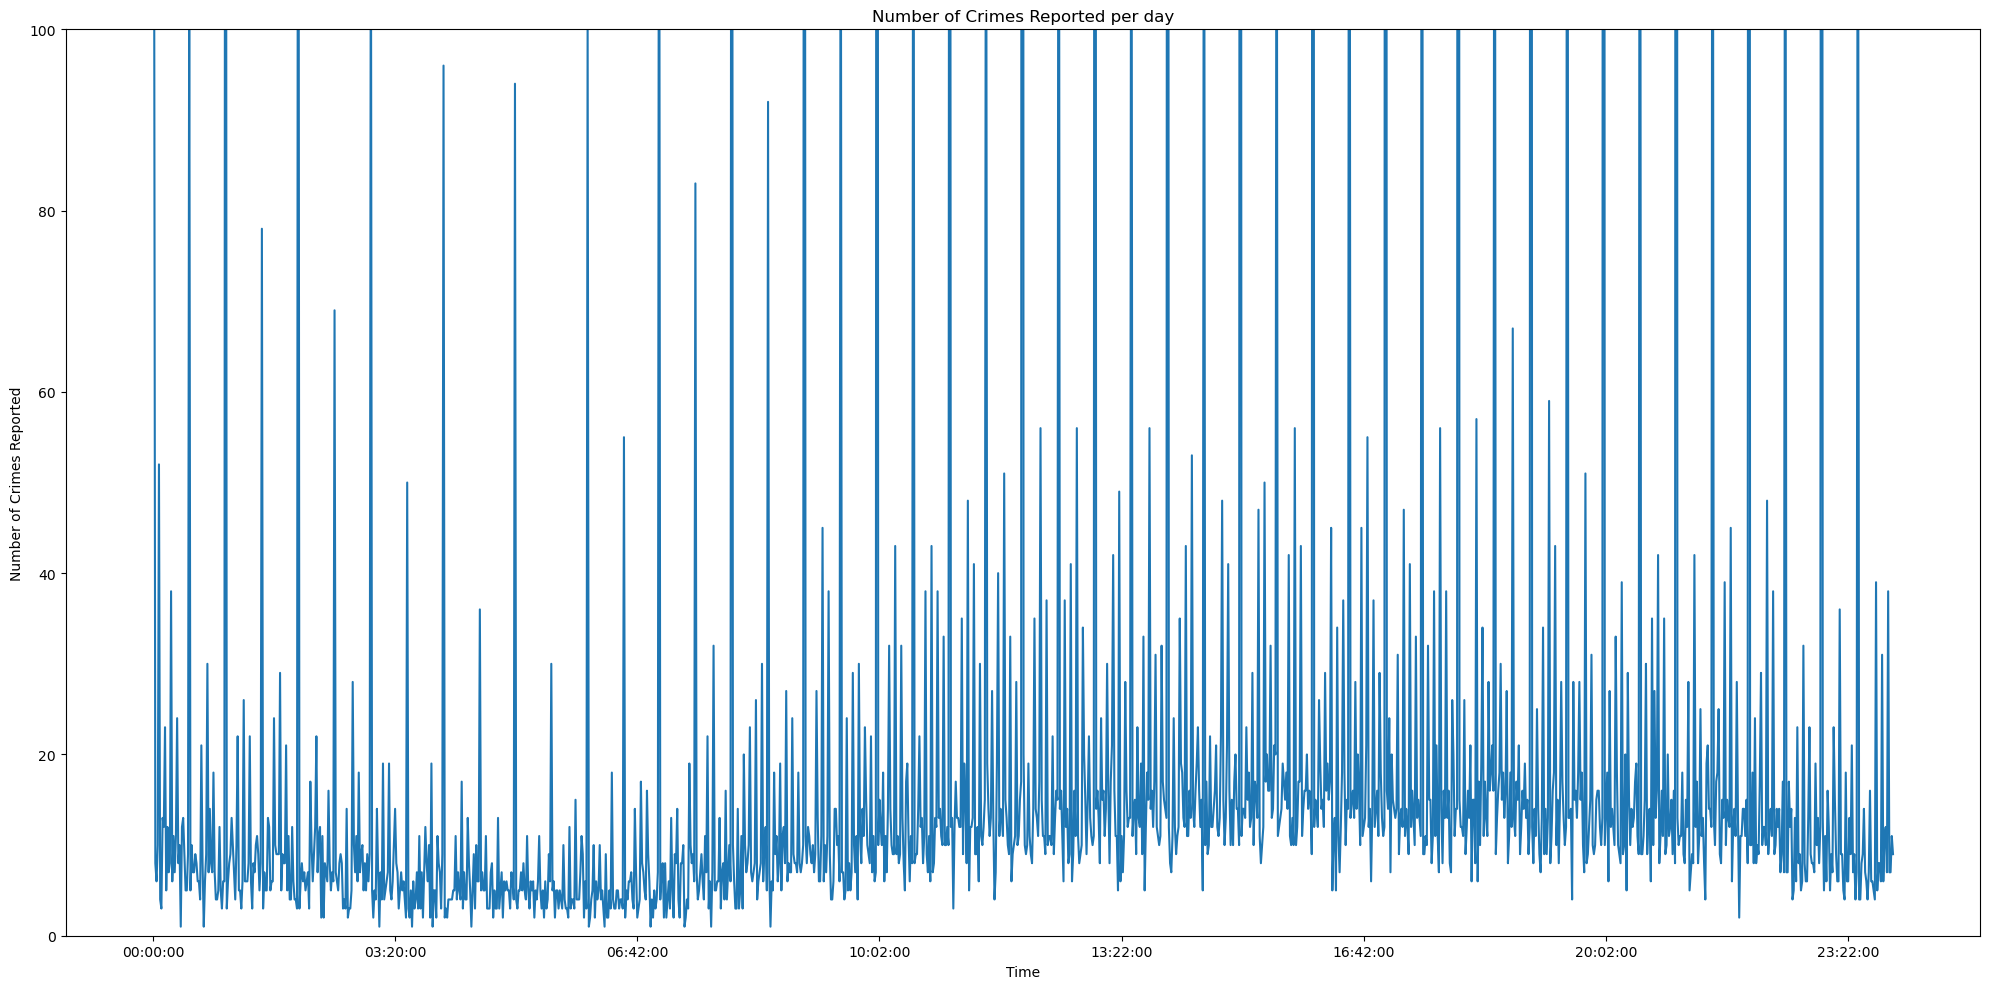

In [20]:
DC_crime.groupby('START_TIME').count()['OFFENSE'].plot(kind='line', figsize=(20,10))

# Set the xlabel and ylabel using class methods
plt.ylabel("Number of Crimes Reported")
plt.xlabel("Time")
plt.title("Number of Crimes Reported per day")
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("output_crime_data/Number_of_Crimes_time.png")
plt.show()

In [9]:
DC_crime['OFFENSE'].unique()

array(['robbery', 'theft f/auto', 'motor vehicle theft', 'theft/other',
       'assault w/dangerous weapon', 'homicide', 'burglary', 'sex abuse',
       'arson'], dtype=object)

In [10]:
robbery = DC_crime.loc[DC_crime["OFFENSE"] == "robbery"]
theft_auto = DC_crime.loc[DC_crime["OFFENSE"] == "theft f/auto"]
car_theft = DC_crime.loc[DC_crime["OFFENSE"] == "motor vehicle theft"]
other_theft = DC_crime.loc[DC_crime["OFFENSE"] == "motor vehicle theft"]
aussault = DC_crime.loc[DC_crime["OFFENSE"] == "assault w/dangerous weapon"]
homicide = DC_crime.loc[DC_crime["OFFENSE"] == "homicide"]
abuse = DC_crime.loc[DC_crime["OFFENSE"] == "sex abuse"]
burglary = DC_crime.loc[DC_crime["OFFENSE"] == "burglary"]
arson = DC_crime.loc[DC_crime["OFFENSE"] == "arson"]

arson

# robbery, theft_auto, car_theft, other_theft, aussault, homicide, abuse, burglary, arson 

,YEAR,START_DATE,offensegroup,OFFENSE,offense-text,offensekey,START_TIME
2024,2022,2022-04-30,property,arson,arson,property|arson,16:22:00
2571,2022,2022-09-19,property,arson,arson,property|arson,05:32:00
3446,2023,2022-12-12,property,arson,arson,property|arson,20:15:00
16720,2022,2022-02-09,property,arson,arson,property|arson,13:12:00
18624,2022,2022-08-15,property,arson,arson,property|arson,22:00:00
20967,2023,2023-01-16,property,arson,arson,property|arson,14:15:00
21766,2023,2023-01-26,property,arson,arson,property|arson,18:26:00
21867,2023,2023-01-30,property,arson,arson,property|arson,08:00:00


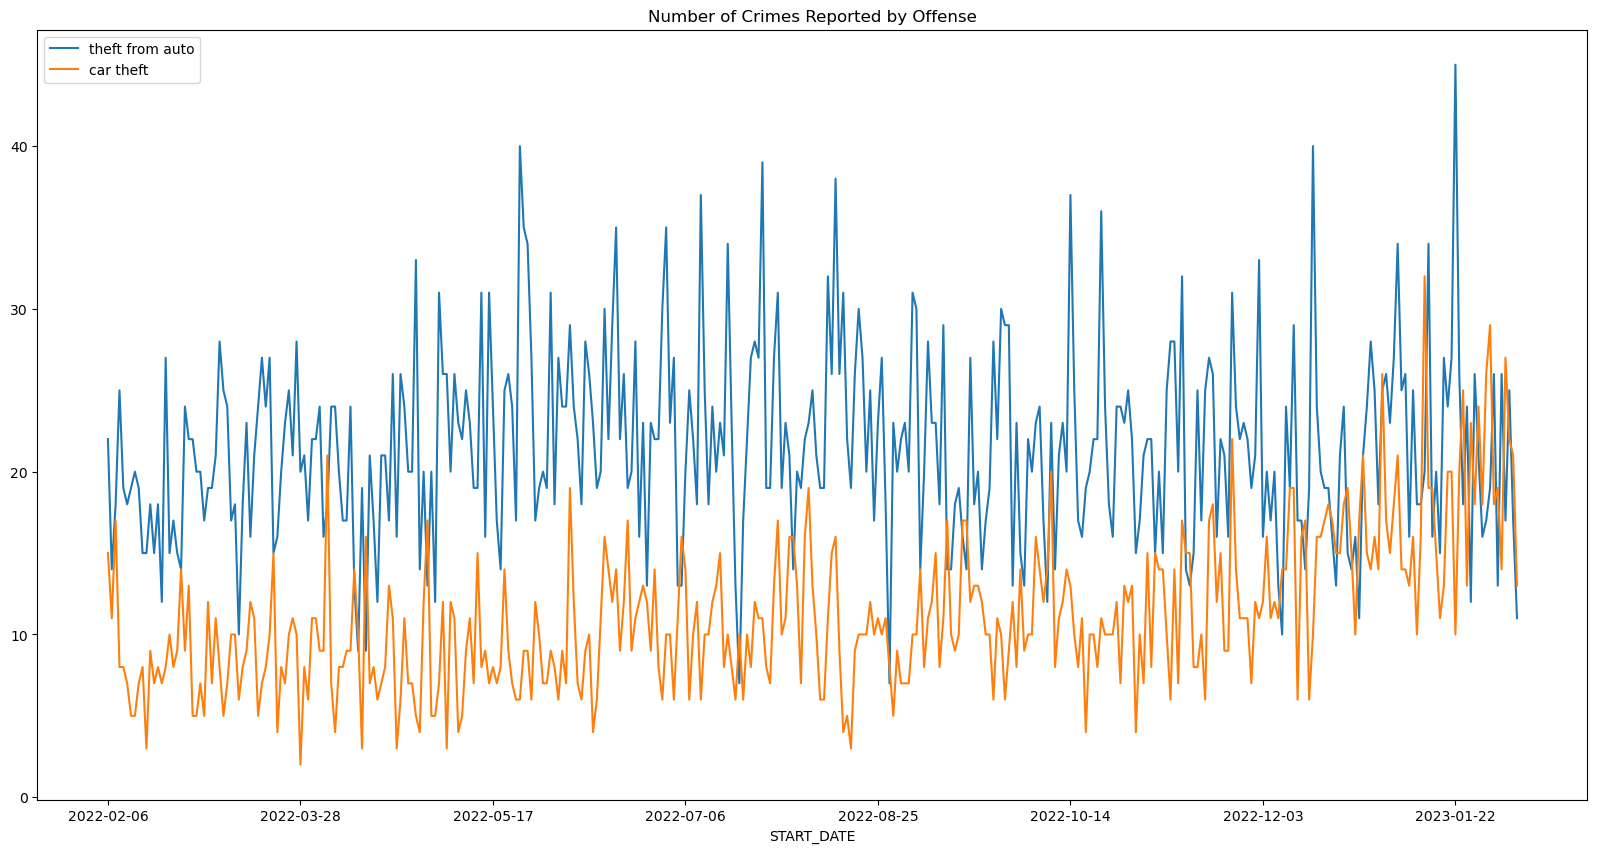

In [17]:
# plot lines
# x = DC_crime.groupby('START_DATE').count()
# robbery.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "robbery")
theft_auto.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "theft from auto")
car_theft.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "car theft")
# other_theft.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "other theft")
# aussault.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "aussault")
# homicide.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "homicide")
# abuse.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "sex abuse")
# burglary.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "burglary")
# arson.groupby('START_DATE').count()['OFFENSE'].plot(kind='line', figsize=(20,10), label = "arson")

plt.title('Number of Crimes Reported by Offense')
plt.legend()

plt.savefig("output_crime_data/Number_of_Car_Crimes.png")
plt.show()

In [15]:
# the mean/ median/ mode for each offense robbery, theft_auto, car_theft, other_theft, aussault, homicide, abuse, burglary, arson 
robbery_mean = (robbery.groupby('START_DATE')['OFFENSE'].count()).mean()
robbery_median = (robbery.groupby('START_DATE')['OFFENSE'].count()).median()
robbery_mode = (robbery.groupby('START_DATE')['OFFENSE'].count()).mode()

theft_auto_mean = (theft_auto.groupby('START_DATE')['OFFENSE'].count()).mean()
theft_auto_median = (theft_auto.groupby('START_DATE')['OFFENSE'].count()).median()
theft_auto_mode = (theft_auto.groupby('START_DATE')['OFFENSE'].count()).mode()

car_theft_mean = (car_theft.groupby('START_DATE')['OFFENSE'].count()).mean()
car_theft_median = (car_theft.groupby('START_DATE')['OFFENSE'].count()).median()
car_theft_mode = (car_theft.groupby('START_DATE')['OFFENSE'].count()).mode()

other_theft_mean = (other_theft.groupby('START_DATE')['OFFENSE'].count()).mean()
other_theft_median = (other_theft.groupby('START_DATE')['OFFENSE'].count()).median()
other_theft_mode = (other_theft.groupby('START_DATE')['OFFENSE'].count()).mode()

aussault_mean = (aussault.groupby('START_DATE')['OFFENSE'].count()).mean()
aussault_median = (aussault.groupby('START_DATE')['OFFENSE'].count()).median()
aussault_mode = (aussault.groupby('START_DATE')['OFFENSE'].count()).mode()

homicide_mean = (homicide.groupby('START_DATE')['OFFENSE'].count()).mean()
homicide_median = (homicide.groupby('START_DATE')['OFFENSE'].count()).median()
homicide_mode = (homicide.groupby('START_DATE')['OFFENSE'].count()).mode()

abuse_mean = (abuse.groupby('START_DATE')['OFFENSE'].count()).mean()
abuse_median = (abuse.groupby('START_DATE')['OFFENSE'].count()).median()
abuse_mode = (abuse.groupby('START_DATE')['OFFENSE'].count()).mode()

burglary_mean = (burglary.groupby('START_DATE')['OFFENSE'].count()).mean()
burglary_median = (burglary.groupby('START_DATE')['OFFENSE'].count()).median()
burglary_mode = (burglary.groupby('START_DATE')['OFFENSE'].count()).mode()

arson_mean = (arson.groupby('START_DATE')['OFFENSE'].count()).mean()
arson_median = (arson.groupby('START_DATE')['OFFENSE'].count()).median()
arson_mode = (arson.groupby('START_DATE')['OFFENSE'].count()).mode()

## print out the mean/ median/ mode for each
print(f"""The mean, median and mode for robbery is:
{robbery_mean} 
{robbery_median}
{robbery_mode}
The mean, median and mode for theft from auto is:
{theft_auto_mean}
{theft_auto_median}
{theft_auto_mode} 
The mean, median and mode for car theft is:
{car_theft_mean} 
{car_theft_median} 
{car_theft_mode} 
The mean, median and mode for all other thefts is:
{other_theft_mean}
{other_theft_median} 
{other_theft_mode} 
The mean, median and mode for aussault with a deadly weapon is:
{aussault_mean} 
{aussault_median} 
{aussault_mode}
The mean, median and mode for homicide is:
{homicide_mean} 
{homicide_median} 
{homicide_mode} 
The mean, median and mode for sexual abuse is:
{abuse_mean}
{abuse_median} 
{abuse_mode} 
The mean, median and mode for burglary is:
{burglary_mean} 
{burglary_median} 
{burglary_mode}
The mean, median and mode for arson is:
{arson_mean}
{arson_median}
{arson_mode} """)

The mean, median and mode for robbery is:
5.516483516483516 
5.0
0    5
Name: OFFENSE, dtype: int64
The mean, median and mode for theft from auto is:
21.547683923705723
21.0
0    20
Name: OFFENSE, dtype: int64 
The mean, median and mode for car theft is:
11.155313351498638 
10.0 
0    10
Name: OFFENSE, dtype: int64 
The mean, median and mode for all other thefts is:
11.155313351498638
10.0 
0    10
Name: OFFENSE, dtype: int64 
The mean, median and mode for aussault with a deadly weapon is:
3.88268156424581 
4.0 
0    3
Name: OFFENSE, dtype: int64
The mean, median and mode for homicide is:
1.375 
1.0 
0    1
Name: OFFENSE, dtype: int64 
The mean, median and mode for sexual abuse is:
1.278688524590164
1.0 
0    1
Name: OFFENSE, dtype: int64 
The mean, median and mode for burglary is:
3.023598820058997 
3.0 
0    2
Name: OFFENSE, dtype: int64
The mean, median and mode for arson is:
1.0
1.0
0    1
Name: OFFENSE, dtype: int64 
